# Simple Linear Regression

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
df = pd.read_csv("simple_linear_regression.csv")
df

,study_hours,exam_score
0,5.745071,58.703177
1,4.792604,49.658277
2,5.971533,56.315204
3,7.284545,74.006716
4,4.648770,47.953062
...,...,...
145,6.172734,58.262795
146,3.144574,35.943739
147,3.019315,31.729648
148,5.782912,61.893434


In [53]:
df.isnull().sum()

study_hours    0
exam_score     0
dtype: int64

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
study_hours,150.0,4.876510,1.413513,1.070382,3.996543,4.919123,5.736401,8.694863
exam_score,150.0,49.979443,15.035989,8.344164,40.021727,50.142846,59.416647,85.167352


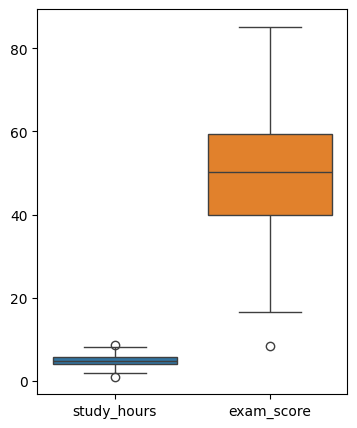

In [65]:
plt.figure(figsize=(4,5))
sns.boxplot(data = df)
plt.show()

In [56]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [57]:
df_clean = remove_outliers(df,"study_hours")

In [58]:
df_clean = remove_outliers(df_clean,"exam_score")

In [59]:
X = df_clean[["study_hours"]]
Y = df_clean["exam_score"]

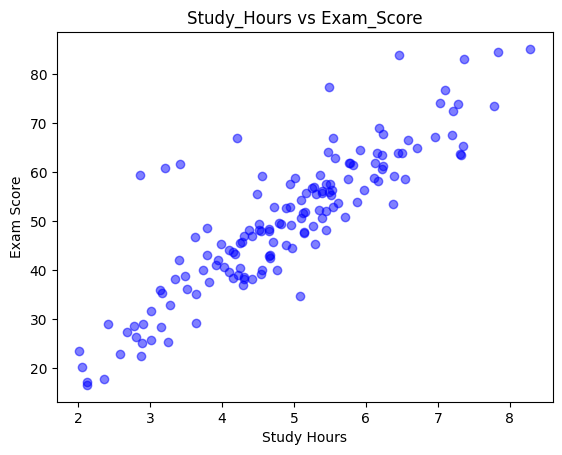

In [86]:
plt.scatter(x = X, y= Y, color = "blue", alpha=0.5)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study_Hours vs Exam_Score")
plt.show()

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [61]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [62]:
Y_pred = model.predict(X_test)

In [63]:
print("MAE: ",mean_absolute_error(Y_test,Y_pred))
print("MSE: ",mean_squared_error(Y_test,Y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("R2_Score: ",r2_score(Y_test,Y_pred))

MAE:  3.708940667076318
MSE:  20.2698847523205
RMSE:  4.50220887479918
R2_Score:  0.891904954329534


In [91]:
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)
print(f"Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}")

Intercept: 4.687357774007161
Slope: 9.341522039036132
Regression Line Equation: y = 9.34x + 4.69


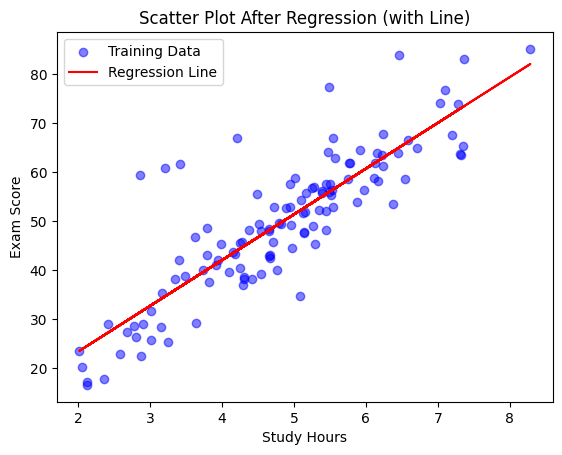

In [89]:
plt.scatter(X_train, Y_train, color='blue', label='Training Data',alpha=0.5)
plt.plot(X_train, model.predict(X_train),color='red',label='Regression Line')
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Scatter Plot After Regression (with Line)")
plt.legend()
plt.show()